<a href="https://colab.research.google.com/github/Ashutosh-C605/Machine-Learning/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
uploaded = files.upload()

Saving final_data.csv to final_data (1).csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers



In [11]:
# Load the dataset
df = pd.read_csv("/content/final_data.csv")

features = ['fs', 'L', 'C']
outputs = ['eff', 'vripple', 'iripple']

# Train/test split
train_df = df.iloc[:1000]
test_df = df.iloc[1000:]

X_train = train_df[features]
y_train = train_df[outputs]
X_test = test_df[features]
y_test = test_df[outputs]


In [12]:
# Scale inputs
input_scaler = StandardScaler()
X_train_scaled = input_scaler.fit_transform(X_train)
X_test_scaled = input_scaler.transform(X_test)

# Scale outputs
output_scaler = StandardScaler()
y_train_scaled = output_scaler.fit_transform(y_train)


In [14]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=50,
    decay_rate=0.95,
    staircase=True
)

# Model with L2 regularization
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],),
          kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(3)  # Output layer for eff, vripple, iripple
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=300,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.7899 - mae: 0.4891 - val_loss: 0.5918 - val_mae: 0.2750
Epoch 2/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4819 - mae: 0.3291 - val_loss: 0.2563 - val_mae: 0.1809
Epoch 3/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3051 - mae: 0.2373 - val_loss: 0.2502 - val_mae: 0.1673
Epoch 4/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2746 - mae: 0.2208 - val_loss: 0.1613 - val_mae: 0.1565
Epoch 5/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2519 - mae: 0.2226 - val_loss: 0.2195 - val_mae: 0.1846
Epoch 6/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2126 - mae: 0.1940 - val_loss: 0.1393 - val_mae: 0.1303
Epoch 7/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1696 - mae: 0.1614 - val_loss: 0.1510 - val_mae: 0.1551
Epoch 8/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1497 - mae: 0.1537 - val_loss: 0.1175 - val_mae: 0.1317
Epoch 9/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.12

In [15]:
# Predict on test set
y_pred_scaled = model.predict(X_test_scaled)
y_pred = output_scaler.inverse_transform(y_pred_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Mean Squared Error:", mse)
print("Test R^2 Score:", r2)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Test Mean Squared Error: 0.7039825916290283
Test R^2 Score: 0.9586091041564941


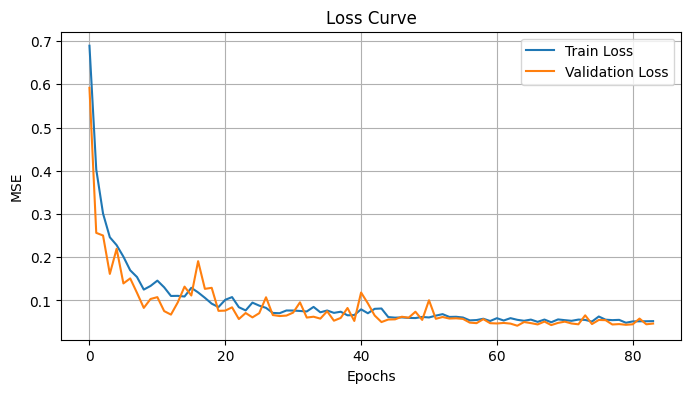

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()
plt.show()

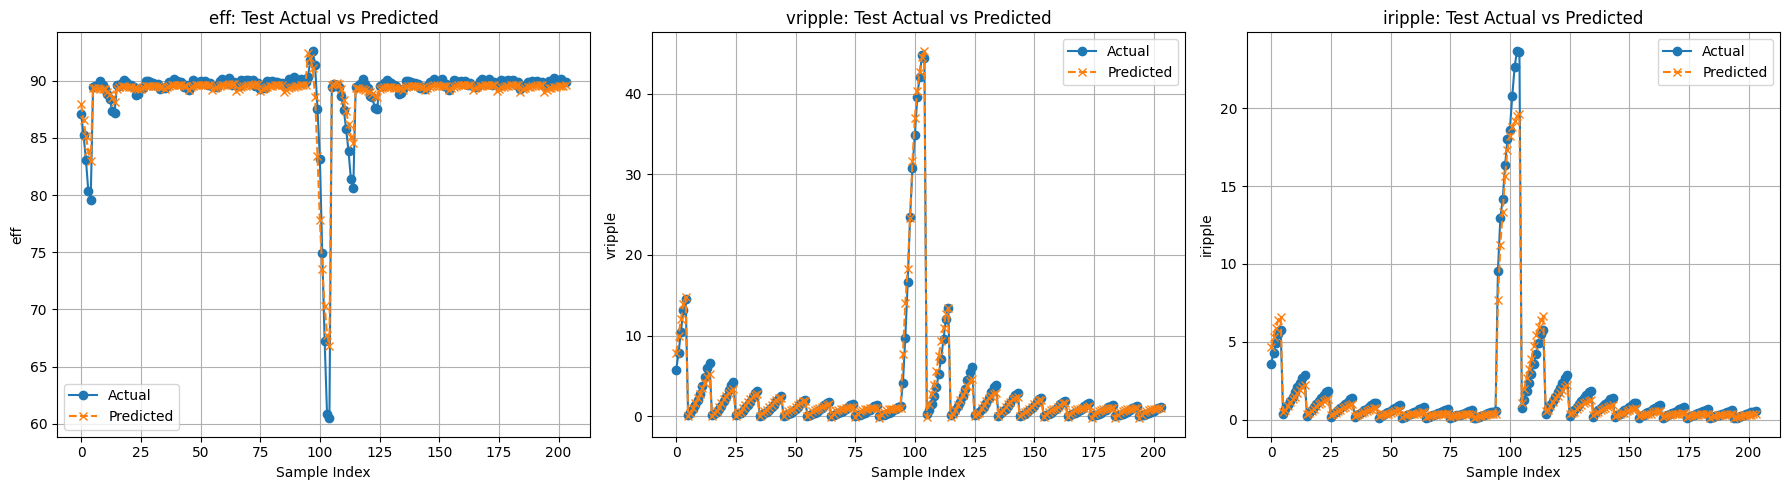

In [17]:
plt.figure(figsize=(18, 5))
for i, output in enumerate(outputs):
    plt.subplot(1, 3, i+1)
    plt.plot(y_test[output].values, label='Actual', linestyle='-', marker='o')
    plt.plot(y_pred[:, i], label='Predicted', linestyle='--', marker='x')
    plt.title(f'{output}: Test Actual vs Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel(output)
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


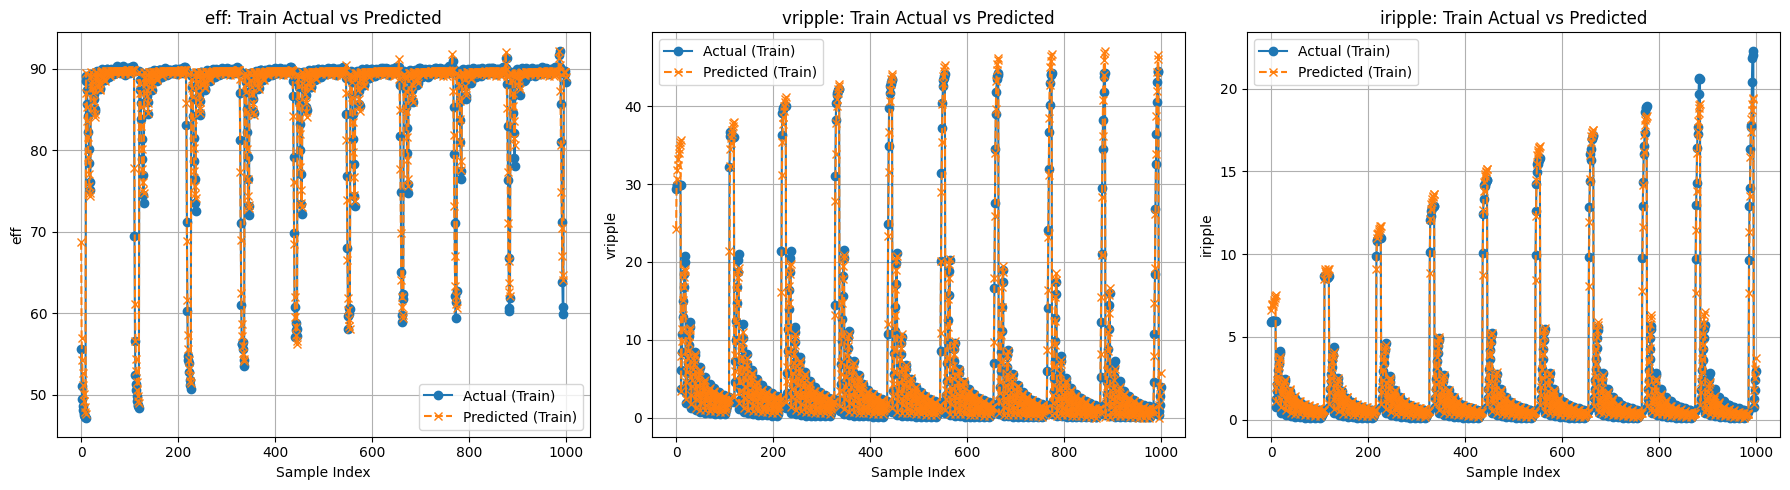

In [18]:
y_train_pred_scaled = model.predict(X_train_scaled)
y_train_pred = output_scaler.inverse_transform(y_train_pred_scaled)

plt.figure(figsize=(18, 5))
for i, output in enumerate(outputs):
    plt.subplot(1, 3, i+1)
    plt.plot(y_train[output].values, label='Actual (Train)', linestyle='-', marker='o')
    plt.plot(y_train_pred[:, i], label='Predicted (Train)', linestyle='--', marker='x')
    plt.title(f'{output}: Train Actual vs Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel(output)
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()